In [1]:
from video import *
import numpy as np

In [2]:
video_a = load_video("train/task2/01_1.mp4", num_frames=1)
video_b = load_video("train/task2/01_2.mp4", num_frames=1)

In [3]:
a = video_a.get_frame(0)
b = video_b.get_frame(0)

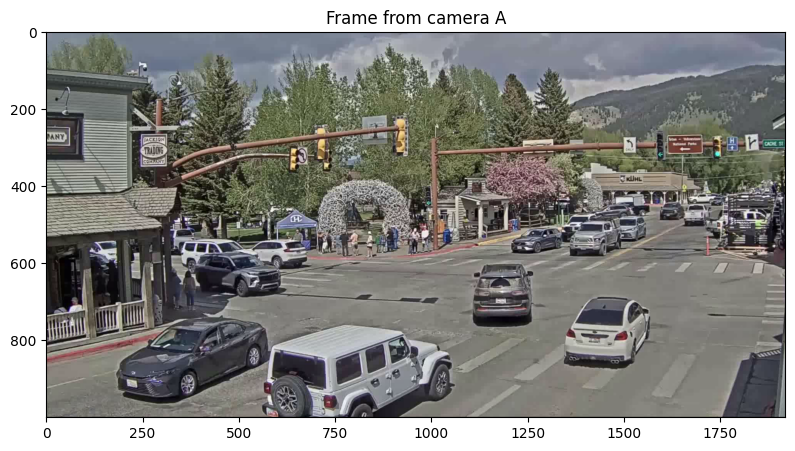

In [4]:
plt.figure(figsize=(10, 5))
plt.title("Frame from camera A")
plt.imshow(a)

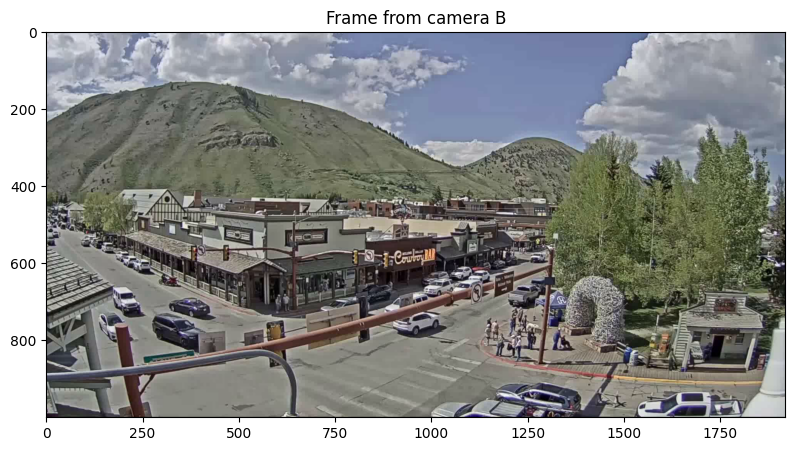

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Frame from camera B")
plt.imshow(b)

In [6]:
cv.imwrite("correspondences/camera_a.png", cv.cvtColor(a, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_b.png", cv.cvtColor(b, cv.COLOR_RGB2BGR))

True

In [7]:
coordinates_a = np.array(
    [
        [1011, 564],
        [1040, 514],
        [1127, 437],
        [652, 313],
        [737, 311],
        [313, 473],
        [920, 238],
        [666, 314],
        [1005, 280],
        [599, 495],
        [95, 212],
        [1890, 288],
        [1658, 288],
        [1433, 288],
        [1228, 549],
        [1831, 285],
        [1397, 529],
        [653, 474],
        [287, 689],
        [219, 187],
        [1309, 849],
        [93, 325],
        [1089, 598],
    ]
)

coordinates_b = np.array(
    [
        [1257, 857],
        [1508, 821],
        [1662, 762],
        [797, 575],
        [875, 582],
        [512, 617],
        [384, 564],
        [841, 576],
        [1307, 568],
        [1270, 693],
        [536, 512],
        [324, 854],
        [755, 757],
        [1039, 673],
        [1187, 925],
        [435, 821],
        [1022, 971],
        [1304, 690],
        [513, 690],
        [569, 503],
        [212, 770],
        [533, 549],
        [998, 887],
    ]
)

F, mask = cv.findFundamentalMat(coordinates_a, coordinates_b, cv.FM_8POINT)
print(F)
print(mask)

[[ 1.65887616e-07  8.49281357e-07 -4.56834354e-04]
 [ 7.60181798e-07 -3.41736319e-07 -1.66985569e-03]
 [-4.59379400e-04  2.97433247e-04  1.00000000e+00]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera B')

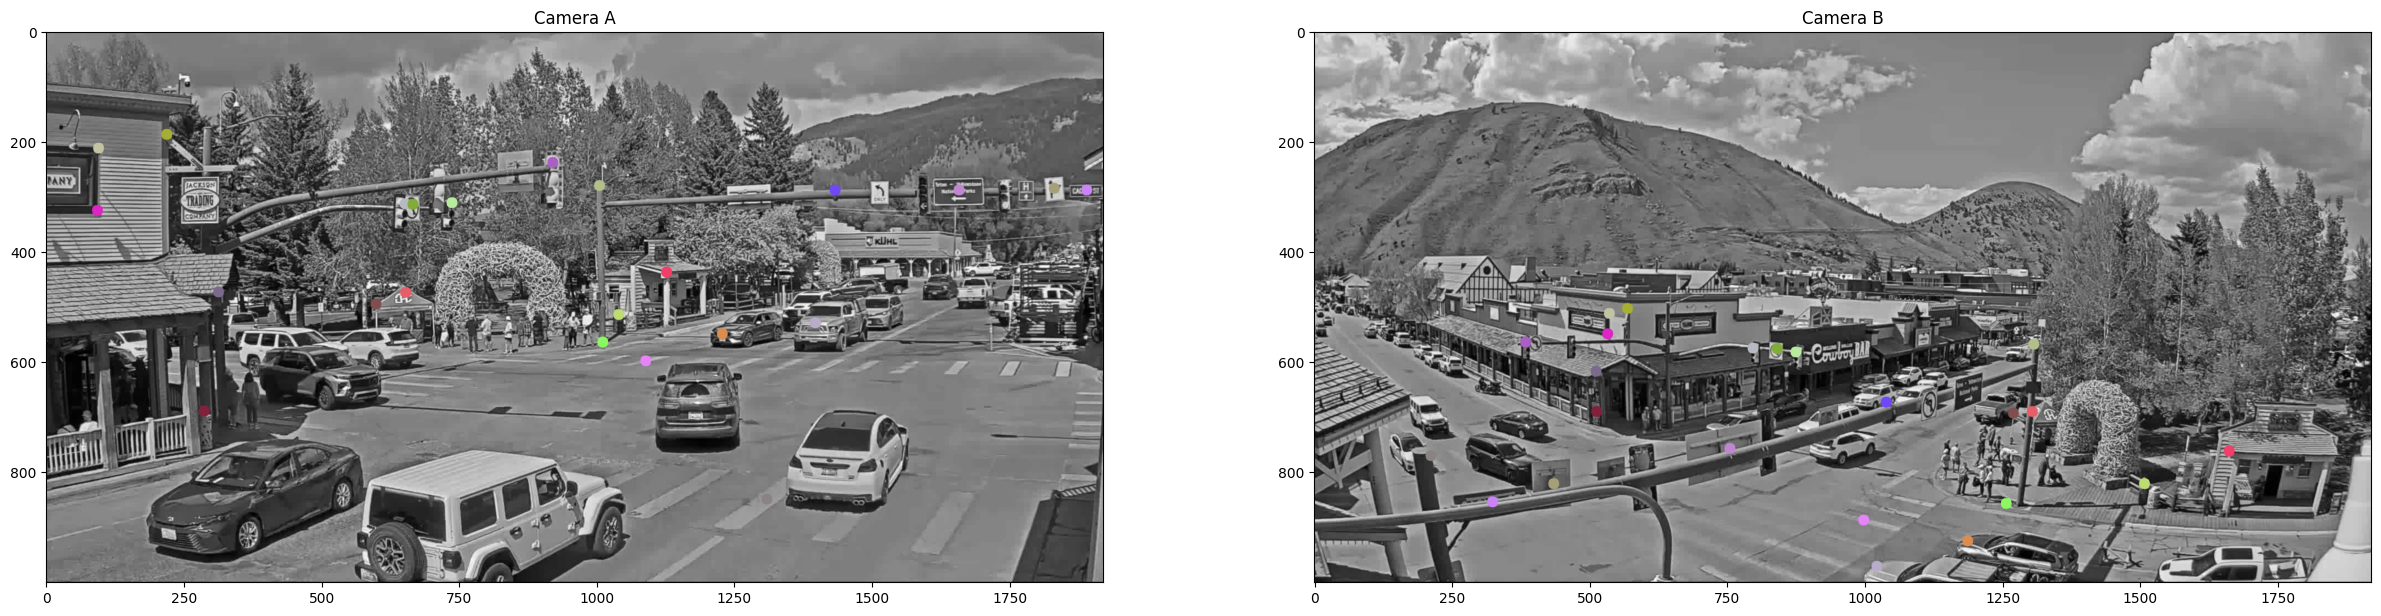

In [8]:
a_points = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_points = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_a))]
for i in range(len(coordinates_a)):
    cv.circle(a_points, tuple(coordinates_a[i]), 10, colors[i], -1)
    cv.circle(b_points, tuple(coordinates_b[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_points)
ax[0].set_title("Camera A")
ax[1].imshow(b_points)
ax[1].set_title("Camera B")

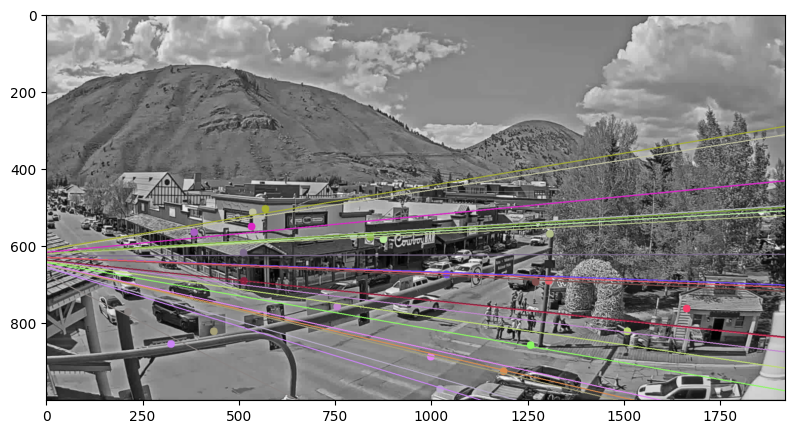

In [9]:
epilines = cv.computeCorrespondEpilines(coordinates_a.reshape(-1, 1, 2), 1, F)

for i, line in enumerate(epilines):
    line = line[0]
    x0, y0 = map(int, [0, -line[2] / line[1]])
    x1, y1 = map(int, [b.shape[1], -(line[2] + line[0] * b.shape[1]) / line[1]])
    cv.line(b_points, (x0, y0), (x1, y1), colors[i], 2)

plt.figure(figsize=(10, 5))
plt.imshow(b_points)

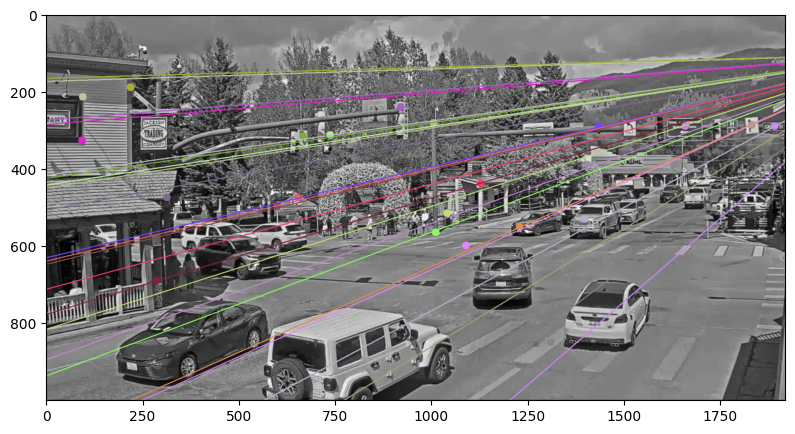

In [10]:
epilines = cv.computeCorrespondEpilines(coordinates_b.reshape(-1, 1, 2), 2, F)

for i, line in enumerate(epilines):
    line = line[0]
    x0, y0 = map(int, [0, -line[2] / line[1]])
    x1, y1 = map(int, [b.shape[1], -(line[2] + line[0] * b.shape[1]) / line[1]])
    cv.line(a_points, (x0, y0), (x1, y1), colors[i], 2)

plt.figure(figsize=(10, 5))
plt.imshow(a_points)

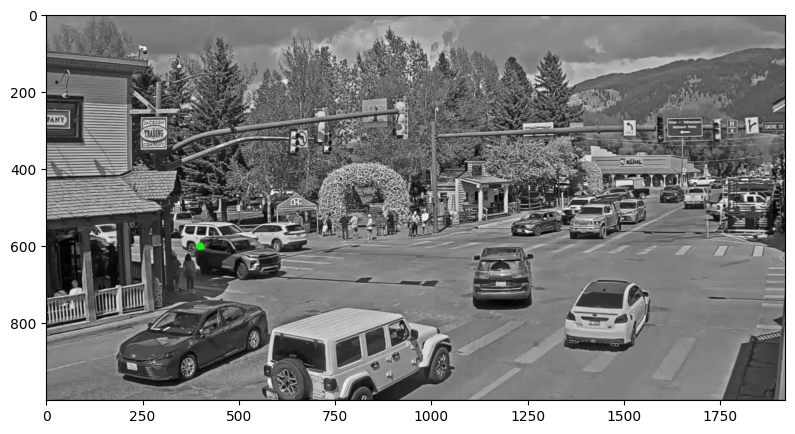

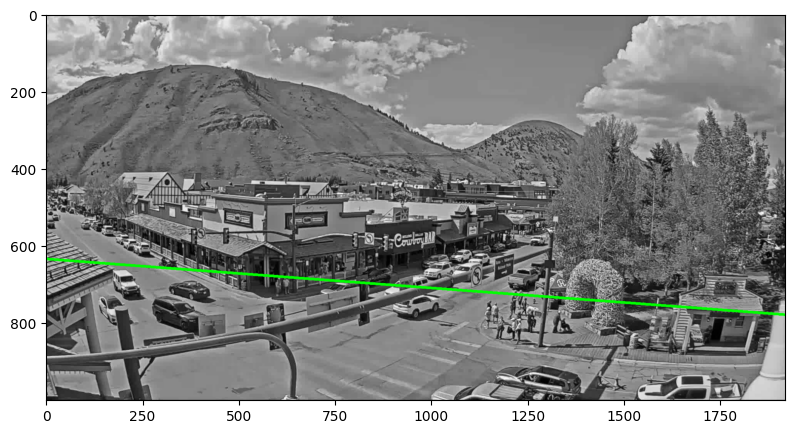

In [11]:
a_copy = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_copy = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [400, 600]
cv.circle(a_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [b.shape[1], -(epiline[2] + epiline[0] * b.shape[1]) / epiline[1]])
cv.line(b_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(a_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(b_copy)
plt.show()

In [12]:
np.save("fundamental_matrices/AB.npy", F)